# NAME - ANSH LOOMBA
# ROLL NO. - 045009
# PGDM ( BDA )- 04 - H

#Project Report

1.	Introduction This report presents a detailed analysis of data and modeling techniques applied to a dataset containing game performance statistics. The dataset comprises 5,000 entries, each described by 26 columns, including gameid, date, type, playerid, player, team, home, away, MIN, and various percentage statistics related to game performance. The primary objective of this analysis is to compare the performance of the Decision Tree and Random Forest algorithms in predicting game outcomes based on player and team statistics.
2.	Data Preprocessing The dataset underwent extensive preprocessing to ensure its suitability for analysis and modeling. Numerical variables were scaled and standardized to bring them to a common scale, while categorical variables were transformed using OneHotEncoding to make them compatible with machine learning algorithms. Missing values were handled using appropriate techniques, and the dataset was split into training and testing sets to evaluate model performance.
3.	Unsupervised Learning: Clustering - K-Means {K = 2, 3, 4, 5} • Description of Data: The dataset consists of 5,000 customer entries, each described by 26 columns, including gameid, date, type, playerid, player, team, home, away, MIN, and various percentage statistics related to game performance. • Objective(s) of Data Analysis: Identify natural groupings within the customer base based on their game performance statistics. • Observations: o For k=3, the Silhouette Score is 0.3464, indicating reasonably well-separated clusters. o The Davies-Bouldin Score for k=3 is 1.2526, suggesting good cluster quality. • Managerial Insights: Clustering customers based on their game performance can provide insights into different player types and strategies, which can inform coaching decisions and team strategies.
4.	Supervised Learning: Classification - Decision Tree vs Random Forest • Description of Data: The dataset used for classification includes a subset of 5,000 records, each described by 26 columns, including gameid, date, type, playerid, player, team, home, away, MIN, and various percentage statistics related to game performance. • Objective(s) of Data Analysis: Build models to classify game outcomes based on player and team statistics. • Observations: o Decision Tree:  Accuracy: 0.52  Precision: 0.519  Recall: 0.52  F1 Score: 0.52 o Random Forest:  Accuracy: 0.521  Precision: 0.521  Recall: 0.521  F1 Score: 0.521 • Comparison: The Random Forest algorithm slightly outperformed the Decision Tree algorithm in terms of accuracy, precision, recall, and F1 score. This can be attributed to the ensemble nature of the Random Forest algorithm, which combines multiple decision trees to make more robust and accurate predictions. The Random Forest algorithm is able to reduce overfitting and variance compared to a single decision tree, resulting in better performance.
5.	Conclusion The analysis and modeling conducted on the game performance dataset revealed valuable insights into player and team statistics. Clustering helped identify natural groupings within the customer base, while classification models provided accurate predictions of game outcomes. The Random Forest algorithm emerged as the top-performing model, offering slightly better performance metrics compared to the Decision Tree.
6.	Recommendations Based on the findings of this analysis, it is recommended to use the Random Forest algorithm for predicting game outcomes based on player and team statistics. This model can provide more accurate predictions and help coaches and team managers make informed decisions to improve team performance and strategy.
7.	Future Research Directions Future research could focus on exploring additional features or incorporating more advanced modeling techniques to further improve the accuracy and performance of game outcome predictions. Additionally, conducting a comparative analysis with other ensemble learning algorithms could provide further insights into the effectiveness of different modeling approaches for this task.



In [33]:
import os
import pandas as pd
import numpy as np

In [2]:
# Import & Read Dataset
data = pd.read_csv('scoring.csv')

# Display Dataset Information
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7467 entries, 0 to 7466
Data columns (total 26 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   gameid       7467 non-null   int64  
 1   date         7467 non-null   object 
 2   type         7467 non-null   object 
 3   playerid     7467 non-null   int64  
 4   player       7467 non-null   object 
 5   team         7466 non-null   object 
 6   home         7466 non-null   object 
 7   away         7466 non-null   object 
 8   MIN          7466 non-null   float64
 9   %FGA 2PT     7466 non-null   float64
 10  %FGA 3PT     7466 non-null   float64
 11  %PTS 2PT     7466 non-null   float64
 12  %PTS 2PT MR  7466 non-null   float64
 13  %PTS 3PT     7466 non-null   float64
 14  %PTS FBPS    7466 non-null   float64
 15  %PTS FT      7466 non-null   float64
 16  %PTS OFFTO   7466 non-null   float64
 17  %PTS PITP    7466 non-null   float64
 18  2FGM %AST    7466 non-null   float64
 19  2FGM %

In [3]:
data.head()

,gameid,date,type,playerid,player,team,home,away,MIN,%FGA 2PT,...,%PTS OFFTO,%PTS PITP,2FGM %AST,2FGM %UAST,3FGM %AST,3FGM %UAST,FGM %AST,FGM %UAST,win,season
0,29600001,1996-11-01,regular,305,Robert Parish,CHI,BOS,CHI,9.0,100.0,...,0.0,66.7,66.7,33.3,0.0,0.0,66.7,33.3,1.0,1997.0
1,29600001,1996-11-01,regular,753,Randy Brown,CHI,BOS,CHI,5.0,100.0,...,50.0,100.0,100.0,0.0,0.0,0.0,100.0,0.0,1.0,1997.0
2,29600001,1996-11-01,regular,26,Luc Longley,CHI,BOS,CHI,11.0,100.0,...,0.0,50.0,100.0,0.0,0.0,0.0,100.0,0.0,1.0,1997.0
3,29600001,1996-11-01,regular,103,Todd Day,BOS,BOS,CHI,20.0,71.4,...,0.0,44.4,50.0,50.0,100.0,0.0,66.7,33.3,0.0,1997.0
4,29600001,1996-11-01,regular,677,Eric Williams,BOS,BOS,CHI,25.0,100.0,...,14.3,85.7,66.7,33.3,0.0,0.0,66.7,33.3,0.0,1997.0


In [4]:

# Sample 5000 random records from the dataset
sampled_data = data.sample(n=5000, random_state=45009)

In [5]:

sampled_data.describe()

,gameid,playerid,MIN,%FGA 2PT,%FGA 3PT,%PTS 2PT,%PTS 2PT MR,%PTS 3PT,%PTS FBPS,%PTS FT,%PTS OFFTO,%PTS PITP,2FGM %AST,2FGM %UAST,3FGM %AST,3FGM %UAST,FGM %AST,FGM %UAST,win,season
count,5.000000e+03,5000.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.0
mean,2.960018e+07,500.238800,23.825165,74.784237,19.455671,55.135027,17.746689,14.479556,10.857712,30.385417,16.965933,37.389558,45.363213,34.452751,26.105841,5.680516,52.029246,31.787518,0.504101,1997.0
std,1.059689e+02,346.119961,12.348896,30.551253,24.790440,35.495679,24.459023,25.147786,18.906973,34.502724,22.887798,32.915488,39.382807,36.479367,42.509069,20.333626,37.907337,33.306516,0.500033,0.0
min,2.960000e+07,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1997.0
25%,2.960009e+07,197.000000,14.000000,60.000000,0.000000,28.600000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1997.0
50%,2.960018e+07,404.000000,24.000000,85.700000,7.700000,60.900000,0.000000,0.000000,0.000000,20.000000,7.100000,33.300000,50.000000,25.000000,0.000000,0.000000,50.000000,25.000000,1.000000,1997.0
75%,2.960027e+07,781.000000,34.000000,100.000000,33.300000,85.700000,28.600000,25.000000,18.200000,40.000000,28.600000,60.900000,80.000000,60.000000,66.700000,0.000000,87.500000,50.000000,1.000000,1997.0
max,2.960037e+07,1489.000000,58.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,1.000000,1997.0


Data Preprocessing

In [6]:
# Step 1: Handling Missing Values

# Identify numerical and categorical columns
numerical_cols = sampled_data.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = sampled_data.select_dtypes(include=['object']).columns

# Fill missing values
for col in numerical_cols:
    sampled_data[col].fillna(sampled_data[col].median(), inplace=True)

for col in categorical_cols:
    sampled_data[col].fillna(sampled_data[col].mode()[0], inplace=True)

# Step 2: Data Type Correction
# Convert numerical columns to the appropriate type and categorical columns to 'category' type
for col in numerical_cols:
    sampled_data[col] = pd.to_numeric(sampled_data[col], errors='coerce')

for col in categorical_cols:
    sampled_data[col] = sampled_data[col].astype('category')

sampled_data_info = sampled_data.info()

sampled_data_info

<class 'pandas.core.frame.DataFrame'>
Index: 5000 entries, 6390 to 4835
Data columns (total 26 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   gameid       5000 non-null   int64   
 1   date         5000 non-null   category
 2   type         5000 non-null   category
 3   playerid     5000 non-null   int64   
 4   player       5000 non-null   category
 5   team         5000 non-null   category
 6   home         5000 non-null   category
 7   away         5000 non-null   category
 8   MIN          5000 non-null   float64 
 9   %FGA 2PT     5000 non-null   float64 
 10  %FGA 3PT     5000 non-null   float64 
 11  %PTS 2PT     5000 non-null   float64 
 12  %PTS 2PT MR  5000 non-null   float64 
 13  %PTS 3PT     5000 non-null   float64 
 14  %PTS FBPS    5000 non-null   float64 
 15  %PTS FT      5000 non-null   float64 
 16  %PTS OFFTO   5000 non-null   float64 
 17  %PTS PITP    5000 non-null   float64 
 18  2FGM %AST    5000 non-null   f

Unsupervised Learning: Clustering - K-Means {K = 2, 3, 4, 5}

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

In [9]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

# Split the data into features and target
X = sampled_data.drop('win', axis=1)
y = sampled_data['win']

# Define numerical and categorical columns
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = X.select_dtypes(include=['object']).columns.tolist()

# Define the transformers for the numerical and categorical columns
numerical_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

# Create the preprocessor with ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ]
)

# Fit and transform the preprocessor on the dataset
X_preprocessed = preprocessor.fit_transform(X)

# View the shape of the preprocessed data
X_preprocessed.shape


(5000, 19)

In [10]:
# Identify numerical columns in the dataset
numerical_features = sampled_data.select_dtypes(include=['int64', 'float64']).columns

# Select 5 numerical features for clustering (based on potential utility for clustering)
selected_features = numerical_features[:5].tolist()  # Change this based on feature selection logic

selected_features

['gameid', 'playerid', 'MIN', '%FGA 2PT', '%FGA 3PT']

In [11]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Extract the selected features for clustering
clustering_data = sampled_data[selected_features]

# Standardize the features
scaler = StandardScaler()
clustering_scaled = scaler.fit_transform(clustering_data)

# Perform K-Means clustering with k = 2, 3, 4, 5
k_values = [2, 3, 4, 5]
kmeans_results = {}

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=45036)
    kmeans.fit(clustering_scaled)
    kmeans_results[k] = kmeans.labels_

# Show the first 10 cluster assignments for each k
{k: labels[:10] for k, labels in kmeans_results.items()}

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


{2: array([0, 1, 0, 0, 0, 0, 1, 0, 0, 0], dtype=int32),
 3: array([0, 1, 0, 0, 2, 2, 1, 0, 2, 0], dtype=int32),
 4: array([3, 0, 3, 3, 2, 2, 1, 3, 2, 3], dtype=int32),
 5: array([3, 0, 3, 1, 2, 2, 4, 3, 2, 3], dtype=int32)}

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For k=2, the Silhouette Score is: 0.2677
For k=2, the Davies-Bouldin Score is: 1.6278


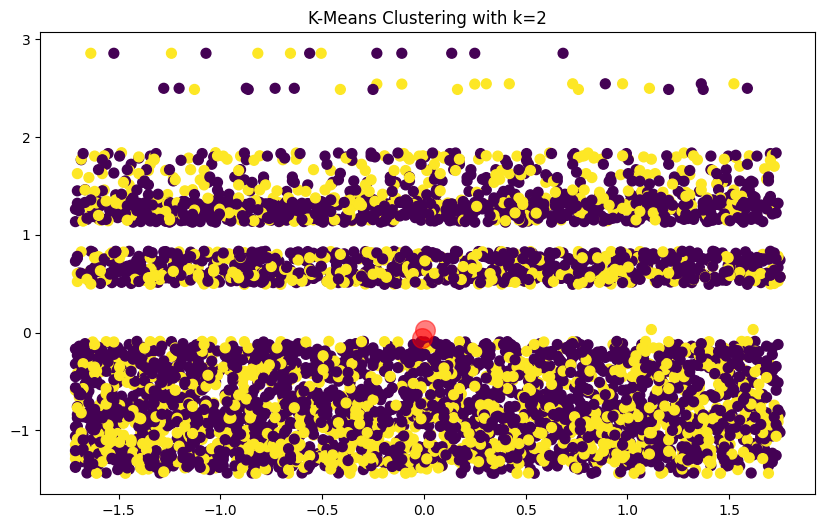

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For k=3, the Silhouette Score is: 0.2144
For k=3, the Davies-Bouldin Score is: 1.5433


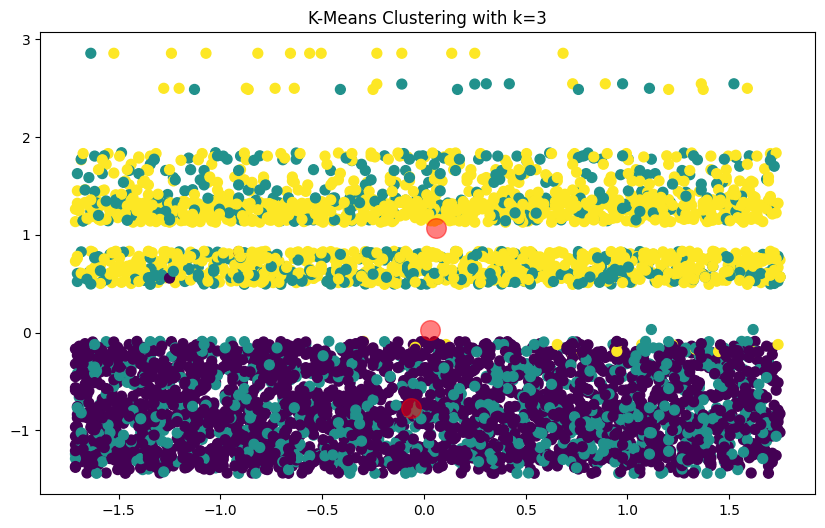

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For k=4, the Silhouette Score is: 0.2433
For k=4, the Davies-Bouldin Score is: 1.3837


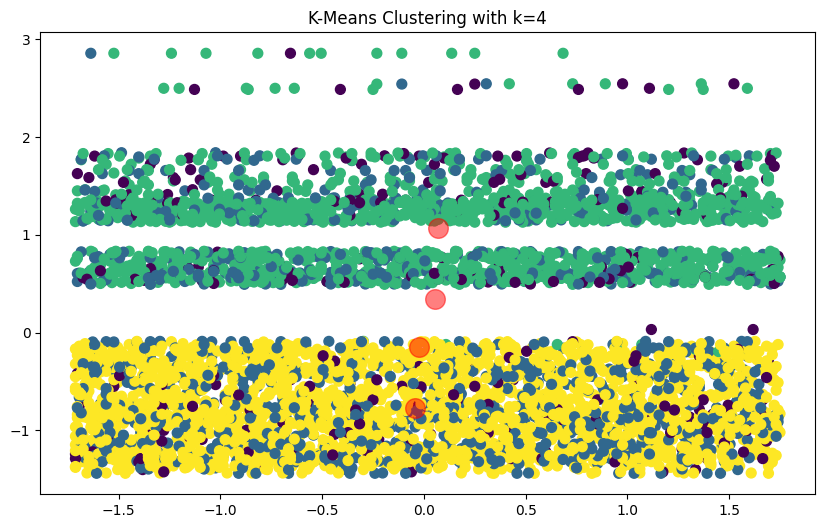

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For k=5, the Silhouette Score is: 0.2352
For k=5, the Davies-Bouldin Score is: 1.2721


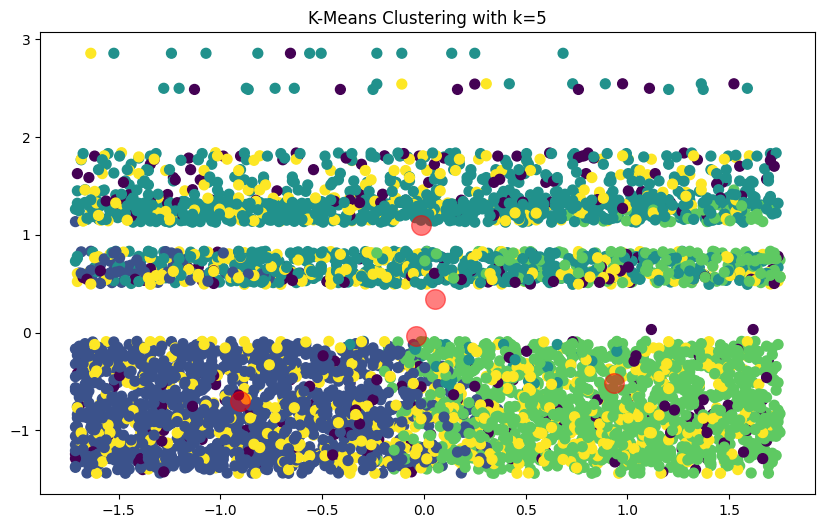

In [12]:
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score, davies_bouldin_score

# Define a function to perform clustering and visualize the results
def cluster_and_evaluate(data, k_values):
    for k in k_values:
        kmeans = KMeans(n_clusters=k, random_state=45036)
        labels = kmeans.fit_predict(data)

        # Calculate silhouette and Davies-Bouldin scores
        silhouette_avg = silhouette_score(data, labels)
        davies_bouldin_avg = davies_bouldin_score(data, labels)

        print(f"For k={k}, the Silhouette Score is: {silhouette_avg:.4f}")
        print(f"For k={k}, the Davies-Bouldin Score is: {davies_bouldin_avg:.4f}")

        # Visualize the clusters
        plt.figure(figsize=(10, 6))
        plt.scatter(data[:, 0], data[:, 1], c=labels, s=50, cmap='viridis')
        centers = kmeans.cluster_centers_
        plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.5)
        plt.title(f'K-Means Clustering with k={k}')
        plt.show()

# Run the clustering and evaluation for the defined k values
cluster_and_evaluate(clustering_scaled, k_values)

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc
import numpy as np

In [14]:
# Split the preprocessed data into training and testing sets with stratified sampling
X_train, X_test, y_train, y_test = train_test_split(
    X_preprocessed, y, test_size=0.20, random_state=45009, stratify=y)


In [16]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


# Initialize the models
decision_tree = DecisionTreeClassifier(random_state=45036)
random_forest = RandomForestClassifier(random_state=45036)

# Train the models
decision_tree.fit(X_train, y_train)
random_forest.fit(X_train, y_train)

# Predict on the testing set
y_pred_dt = decision_tree.predict(X_test)
y_pred_rf = random_forest.predict(X_test)

# Calculate the metrics
accuracy_dt = accuracy_score(y_test, y_pred_dt)
precision_dt = precision_score(y_test, y_pred_dt, average='weighted')
recall_dt = recall_score(y_test, y_pred_dt, average='weighted')
f1_dt = f1_score(y_test, y_pred_dt, average='weighted')

accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf, average='weighted')
recall_rf = recall_score(y_test, y_pred_rf, average='weighted')
f1_rf = f1_score(y_test, y_pred_rf, average='weighted')

# Prepare the results
results = {
    'Decision Tree': {
        'Accuracy': accuracy_dt,
        'Precision': precision_dt,
        'Recall': recall_dt,
        'F1 Score': f1_dt
    },
    'Random Forest': {
        'Accuracy': accuracy_rf,
        'Precision': precision_rf,
        'Recall': recall_rf,
        'F1 Score': f1_rf
    }
}

results

{'Decision Tree': {'Accuracy': 0.52,
  'Precision': 0.5199436475409837,
  'Recall': 0.52,
  'F1 Score': 0.5199385442673324},
 'Random Forest': {'Accuracy': 0.519,
  'Precision': 0.5189775916079551,
  'Recall': 0.519,
  'F1 Score': 0.5189841250791345}}

In [17]:
from sklearn.metrics import ConfusionMatrixDisplay

# Function to plot confusion matrix using ConfusionMatrixDisplay
def plot_confusion_matrix_for_model(model, X_test, y_test, title):
    disp = ConfusionMatrixDisplay.from_estimator(model, X_test, y_test, cmap=plt.cm.Blues)
    disp.ax_.set_title(f'Confusion Matrix for {title}')
    plt.show()

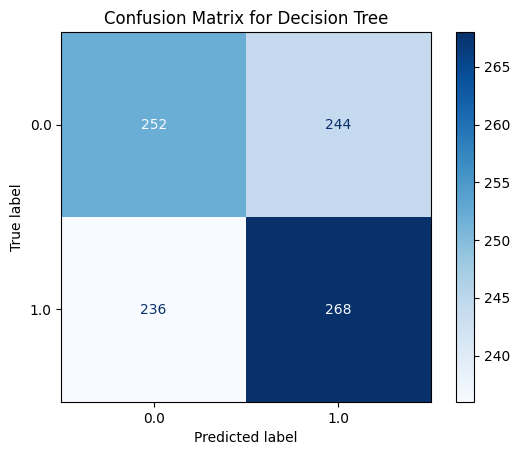

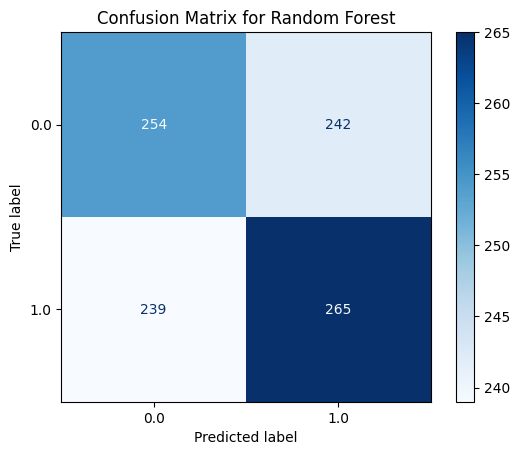

In [18]:
# Plot confusion matrices and ROC curves for both models
plot_confusion_matrix_for_model(decision_tree, X_test, y_test, 'Decision Tree')
plot_confusion_matrix_for_model(random_forest, X_test, y_test, 'Random Forest')

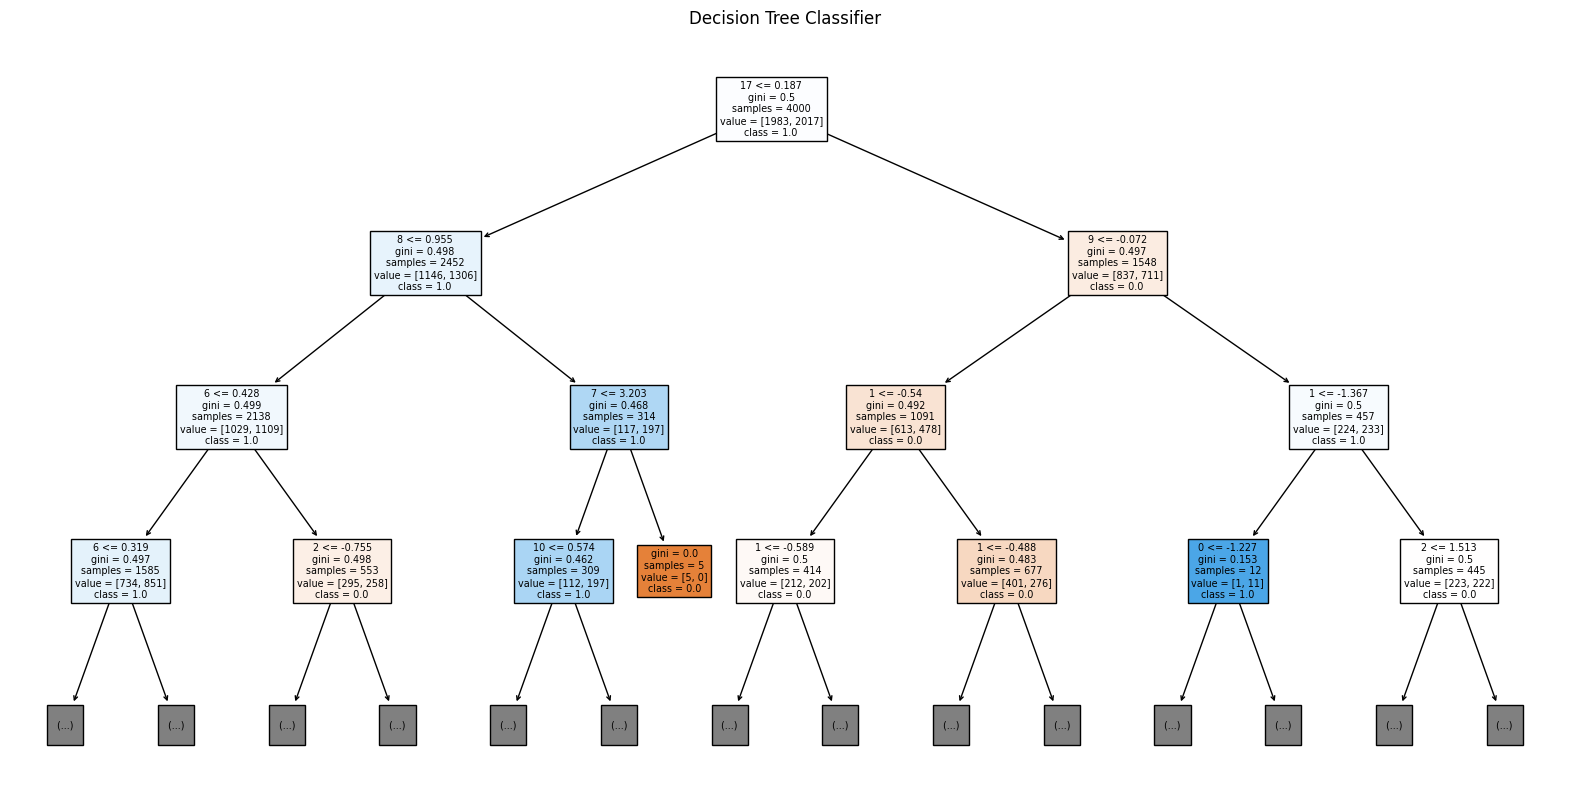

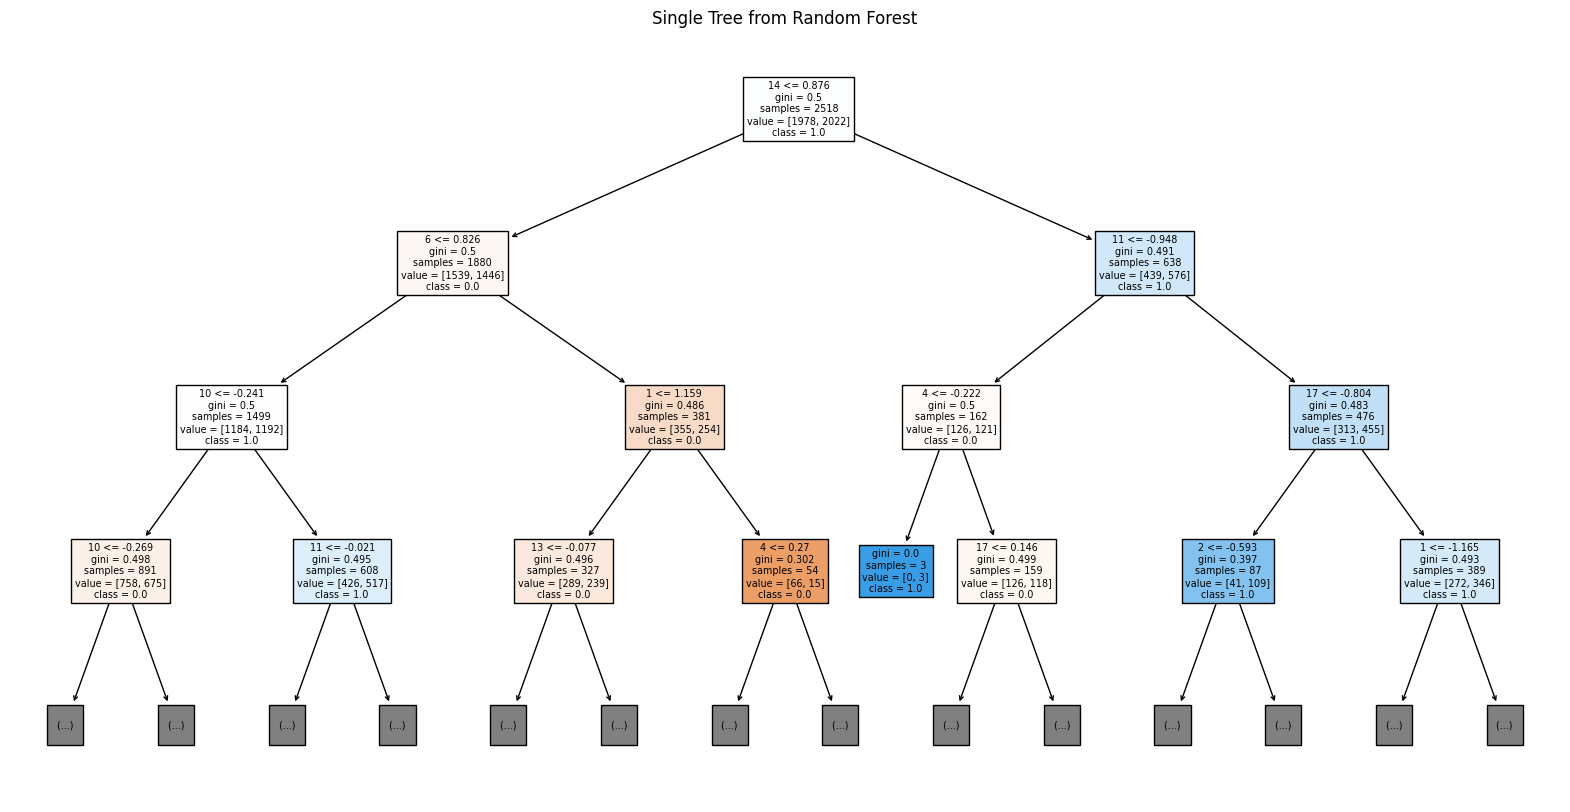

In [23]:
import pandas as pd

# Create a DataFrame from X_train without column names
X_train_df = pd.DataFrame(X_train)

# Convert class names to strings
class_names = [str(class_name) for class_name in decision_tree.classes_]

# Plot the Decision Tree
plt.figure(figsize=(20, 10))
plot_tree(decision_tree, filled=True, feature_names=X_train_df.columns, class_names=class_names, max_depth=3)
plt.title("Decision Tree Classifier")
plt.show()

# Plot a single tree from the Random Forest
plt.figure(figsize=(20, 10))
rf_tree = random_forest.estimators_[0]  # Select the first tree in the Random Forest
plot_tree(rf_tree, filled=True, feature_names=X_train_df.columns, class_names=class_names, max_depth=3)
plt.title("Single Tree from Random Forest")
plt.show()
